In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
# Merge the Two Datasets
raw_df1 = pd.read_csv("./Datasets/train.csv")
# print(len(raw_df1.index)) 122265

raw_df2 = pd.read_csv("./Datasets/census_starter.csv")
# print(len(raw_df2.index)) 3142

comb_df = pd.merge(raw_df1.copy(), raw_df2.copy(), on="cfips")
comb_df.dropna(inplace=True)
comb_df.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'pct_bb_2017', 'pct_bb_2018',
       'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017',
       'pct_college_2018', 'pct_college_2019', 'pct_college_2020',
       'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [19]:
# Drop the Unecessary Columns
comb_df.drop(["row_id", "cfips", "county", "state", "active"], axis=1, inplace=True)
print(len(comb_df.index))
comb_df.columns

122148


Index(['first_day_of_month', 'microbusiness_density', 'pct_bb_2017',
       'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021',
       'pct_college_2017', 'pct_college_2018', 'pct_college_2019',
       'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017',
       'pct_foreign_born_2018', 'pct_foreign_born_2019',
       'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017',
       'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020',
       'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018',
       'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [45]:
print(comb_df.std())
comb_df.mean()

microbusiness_density        4.991087
pct_bb_2017                  9.702052
pct_bb_2018                  9.255863
pct_bb_2019                  8.846665
pct_bb_2020                  8.250864
pct_bb_2021                  7.889931
pct_college_2017             5.586649
pct_college_2018             5.630199
pct_college_2019             5.689780
pct_college_2020             5.776940
pct_college_2021             5.832285
pct_foreign_born_2017        5.696355
pct_foreign_born_2018        5.705591
pct_foreign_born_2019        5.734774
pct_foreign_born_2020        5.684018
pct_foreign_born_2021        5.724552
pct_it_workers_2017          0.986985
pct_it_workers_2018          0.942777
pct_it_workers_2019          0.940891
pct_it_workers_2020          0.990342
pct_it_workers_2021          0.968579
median_hh_inc_2017       13154.424871
median_hh_inc_2018       13703.502202
median_hh_inc_2019       14192.529173
median_hh_inc_2020       14649.568591
median_hh_inc_2021       15541.038914
dtype: float

C:\Users\JRome\AppData\Local\Temp\ipykernel_33276\3106313915.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(comb_df.std())
C:\Users\JRome\AppData\Local\Temp\ipykernel_33276\3106313915.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  comb_df.mean()


microbusiness_density        3.817671
pct_bb_2017                 69.920401
pct_bb_2018                 72.690866
pct_bb_2019                 75.398600
pct_bb_2020                 78.543298
pct_bb_2021                 80.539096
pct_college_2017            13.813399
pct_college_2018            14.005379
pct_college_2019            14.240452
pct_college_2020            14.631328
pct_college_2021            14.851226
pct_foreign_born_2017        4.702451
pct_foreign_born_2018        4.724507
pct_foreign_born_2019        4.769096
pct_foreign_born_2020        4.748520
pct_foreign_born_2021        4.743680
pct_it_workers_2017          1.427148
pct_it_workers_2018          1.382171
pct_it_workers_2019          1.338956
pct_it_workers_2020          1.309265
pct_it_workers_2021          1.272684
median_hh_inc_2017       49754.163908
median_hh_inc_2018       51583.175422
median_hh_inc_2019       53475.909612
median_hh_inc_2020       55012.443312
median_hh_inc_2021       58223.339490
dtype: float

In [63]:
# Plot Features Function
def plot_features(features):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

    count = 0
    for row in ax:
        for col in row:
            col.hist(comb_df[features[count]].unique(), bins=100)
            col.title.set_text(features[count])
            col.set_xticks(np.linspace(0, comb_df[features[count]].max(), 10))
            count += 1
            if count == 5:
                break

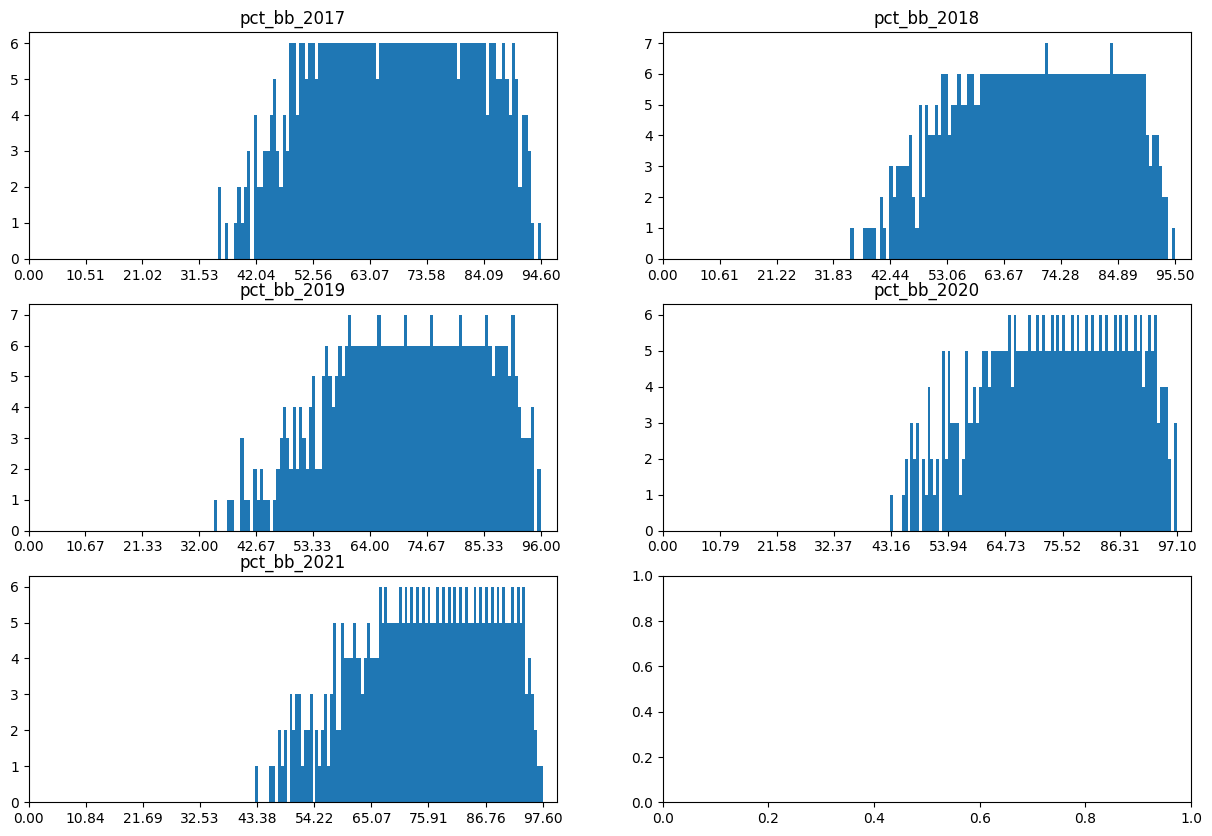

In [64]:
# Observe Features (pct_bb)

features = ["pct_bb_2017", "pct_bb_2018", "pct_bb_2019", "pct_bb_2020", "pct_bb_2021"]
plot_features(features)

In [67]:
# Actually going to only clip the pct values if preformance is lacking
'''
# Going to clip some because there are a couple of outliers:
# pct_bb_2017: clip at 35
# pct_bb_2018: clip at 35
# pct_bb_2020: clip at 43
# pct_bb_2021: clip at 45
comb_df["pct_bb_2017"].clip(lower=35, inplace=True)
comb_df["pct_bb_2018"].clip(lower=35, inplace=True)
comb_df["pct_bb_2020"].clip(lower=43, inplace=True)
comb_df["pct_bb_2021"].clip(lower=43, inplace=True)

features = ["pct_bb_2017", "pct_bb_2018", "pct_bb_2019", "pct_bb_2020", "pct_bb_2021"]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
plt.setp(ax, xticks=range(0,100,5), xticklabels=range(0,100,5))

count = 0
for row in ax:
    for col in row:
        col.hist(comb_df[features[count]].unique(), bins=100)
        col.title.set_text(features[count])
        count += 1
        if count == len(features):
            break
'''
# ----Placeholder---- 
""

''

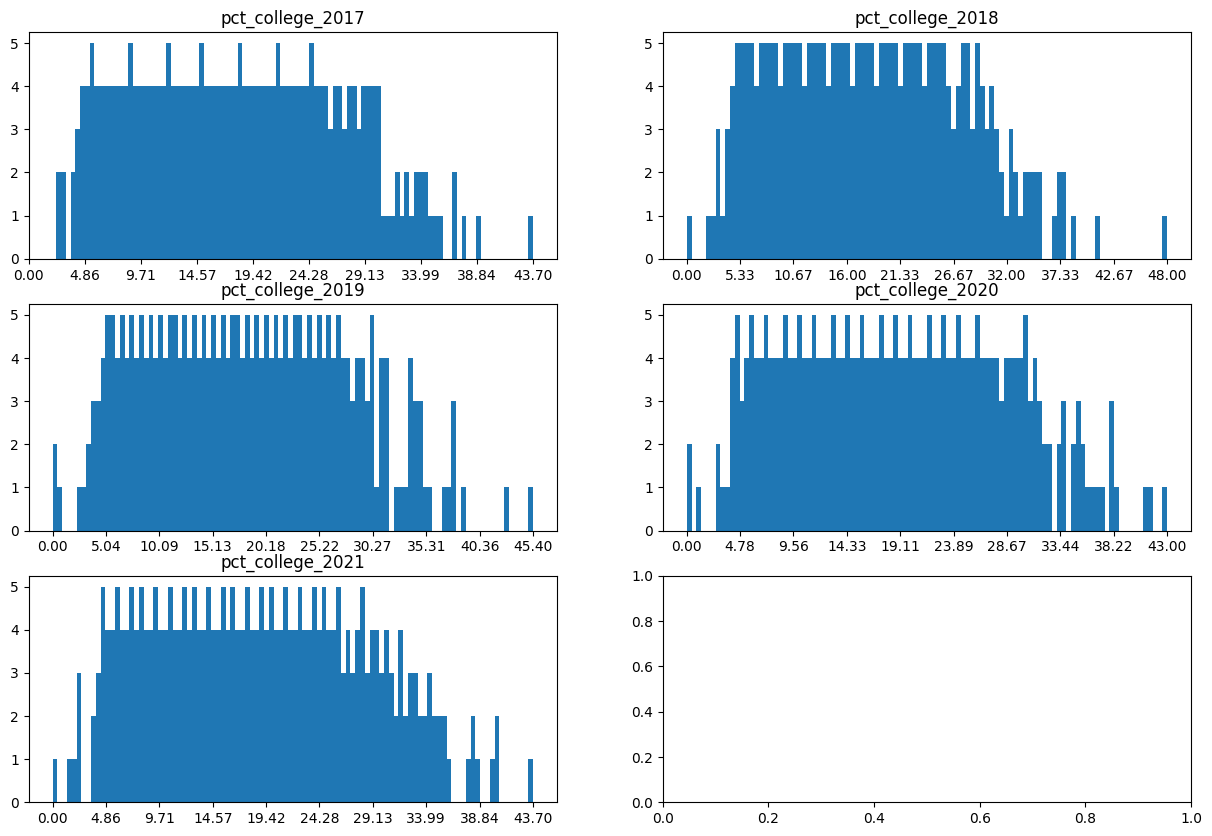

In [68]:
# Observe Features (pct_college)

features = ["pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021"]
plot_features(features)

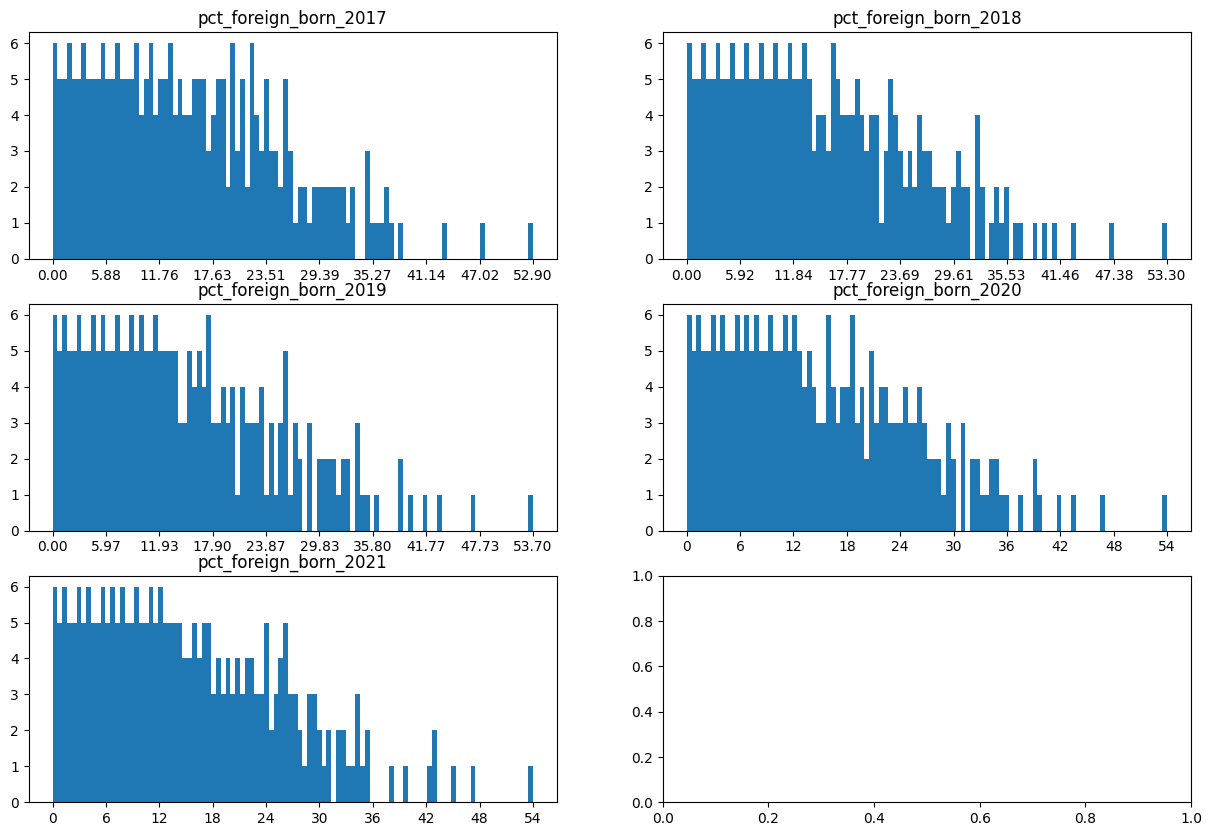

In [69]:
# Observe Features (pct_foreign_born)

features = ["pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021"]
plot_features(features)

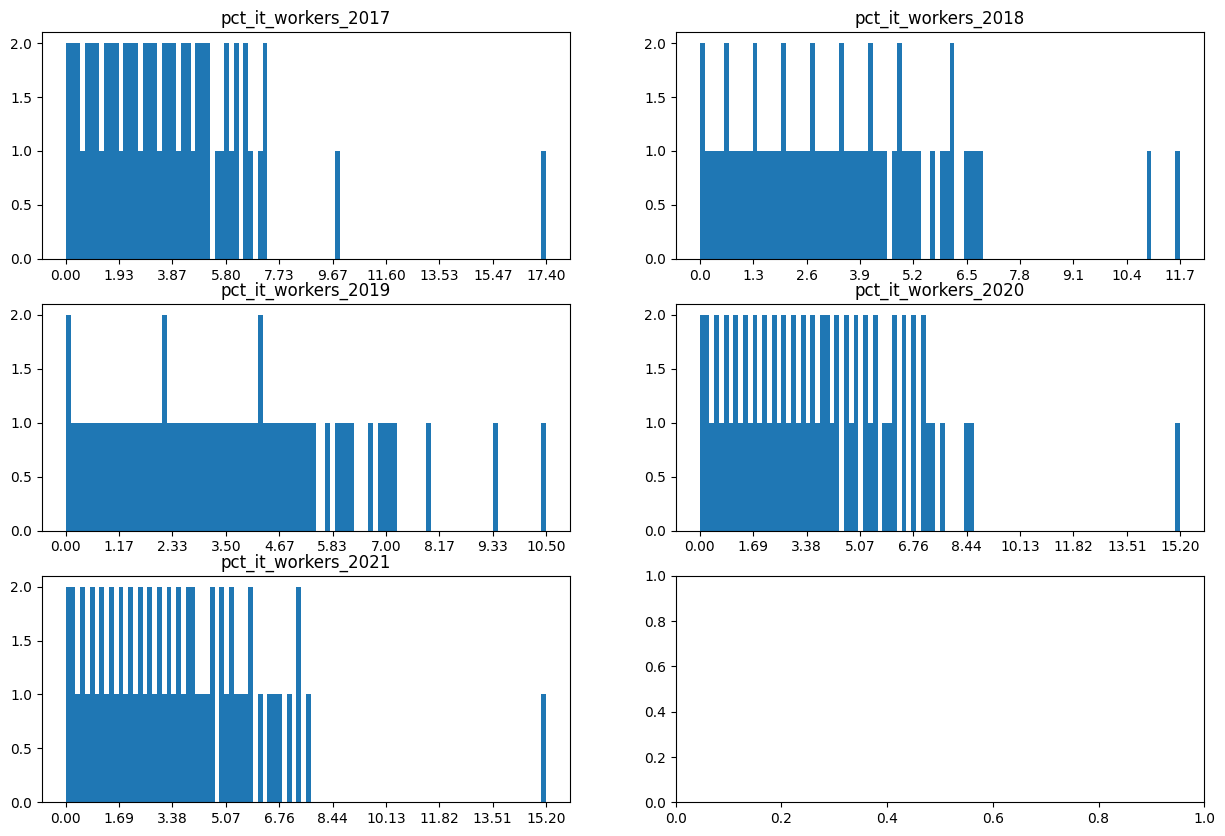

In [70]:
# Observe Features (pct_it_workers)

features = ["pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021"]
plot_features(features)

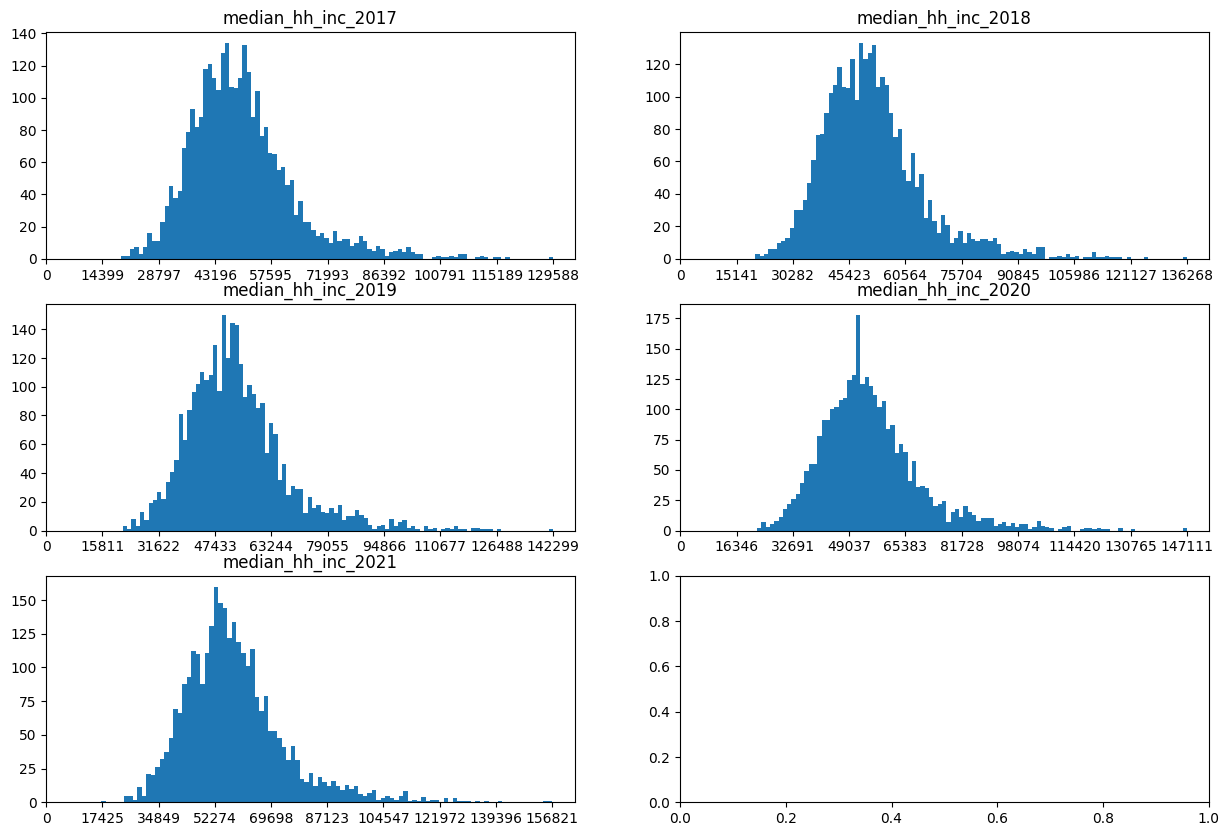

In [72]:
features = ["median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"]
plot_features(features)

In [73]:
comb_df.to_csv("./Datasets/edited_train.csv")